In [4]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cross_validation import train_test_split


In [5]:
lables = pd.read_csv('C:\\Users\\Ujjawal\\Anaconda3\\input_files\\dog-breed-dataset\\file1\\labels.csv')
breed_count=lables['breed'].value_counts()
print(lables.head())
print(breed_count.head(10))
print(breed_count.shape)
print(lables.values)

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64
(120,)
[['000bec180eb18c7604dcecc8fe0dba07' 'boston_bull']
 ['001513dfcb2ffafc82cccf4d8bbaba97' 'dingo']
 ['001cdf01b096e06d78e9e5112d419397' 'pekinese']
 ...
 ['ffe2ca6c940cddfee68fa3cc6c63213f' 'airedale']
 ['ffe5f6d8e2bff356e9482a80a6e29aac' 'miniature_pinscher']
 ['fff43b07992508bc822f33d8ffd902ae' 'chesapeake_bay_retriever']]


In [8]:
#One hot Encoding
targets = pd.Series(lables['breed'])
encoded = pd.get_dummies(targets, sparse = True)
encoded_labels = np.asarray(encoded)
print(encoded.head())
print(encoded_labels)

   affenpinscher  afghan_hound  african_hunting_dog  airedale  \
0              0             0                    0         0   
1              0             0                    0         0   
2              0             0                    0         0   
3              0             0                    0         0   
4              0             0                    0         0   

   american_staffordshire_terrier  appenzeller  australian_terrier  basenji  \
0                               0            0                   0        0   
1                               0            0                   0        0   
2                               0            0                   0        0   
3                               0            0                   0        0   
4                               0            0                   0        0   

   basset  beagle        ...          toy_poodle  toy_terrier  vizsla  \
0       0       0        ...                   0            0

In [9]:
img_rows=128
img_cols=128
no_channels=1

feature_x=[]
feature_y=[]
i=0
for f, img in tqdm(lables.values): # f for format ,jpg
    train_img = cv2.imread('C:\\Users\\Ujjawal\\Anaconda3\\input_files\\dog-breed-dataset//train//{}.jpg'.format(f),0)
    label = encoded_labels[i]
    resized_imgs = cv2.resize(train_img, (img_rows, img_cols)) 
    feature_x.append(resized_imgs)
    feature_y.append(label)
    i += 1

100%|████████████████████████████████████████████████████████████████████████████| 10222/10222 [02:03<00:00, 82.66it/s]


In [10]:
x_train_data = np.array(feature_x, np.float32)/255   # /= 255 for normalisation
print(x_train_data.shape)     #just for checking purpose
x_train_data = np.expand_dims(x_train_data, axis = 3)
print (x_train_data.shape)     #just for checking purpose

y_train_data = np.array(feature_y, np.uint8)
print (y_train_data.shape)    #just for checking purpose

x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)      #just for checking purpose
print (x_val.shape)        #just for checking purpose

(10222, 128, 128)
(10222, 128, 128, 1)
(10222, 120)
(8177, 128, 128, 1)
(2045, 128, 128, 1)


In [11]:
submission = pd.read_csv('C:\\Users\\Ujjawal\\Anaconda3\\input_files\\dog-breed-dataset\\file1\\sample_submission.csv')
print(submission.head(5))
test_img = submission['id']
print (test_img.head(5)) #just for checking purpose


                                 id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset        ...          toy_poodle  \
0            0.008333  0.008

In [20]:
x_test_feature = []

i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    imgs = cv2.imread('C:\\Users\\Ujjawal\\Anaconda3\\input_files\\dog-breed-dataset\\test\\{}.jpg'.format(f), 0)
    resized_img = cv2.resize(imgs, (img_rows, img_cols)) 
    x_test_feature.append(resized_img)
      

100%|████████████████████████████████████████████████████████████████████████████| 10357/10357 [03:22<00:00, 51.07it/s]


In [12]:
#importing keras libray
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Flatten

Using TensorFlow backend.


In [14]:
#Buiding our CNN model
model = Sequential()   #initializing the CNN

#Adding first convolution layer
model.add(Convolution2D (filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu', input_shape = (img_rows, img_cols, no_channels)))

#Pooling process
model.add(MaxPooling2D(pool_size=(2,2)))

#Adding second convolution layer
model.add(Convolution2D (filters = 64, kernel_size = (3,3),padding = 'Same', 
                         activation ='relu')) 

#Pooling process
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening process
model.add(Flatten()) 
# full connection  
model.add(Dense(units = 120, activation = 'relu')) 
# output layer
model.add(Dense(units = 120, activation = 'softmax')) 


In [15]:
#compiling our model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7864440   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
Total para

In [17]:
#Training our model
batch_size = 128 
nb_epochs = 2
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epochs,
                    verbose=2, 
                    validation_data=(x_val, y_val),
                    initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/2
 - 390s - loss: 4.7873 - acc: 0.0110 - val_loss: 4.7865 - val_acc: 0.0078
Epoch 2/2
 - 399s - loss: 4.6734 - acc: 0.0236 - val_loss: 4.6600 - val_acc: 0.0220


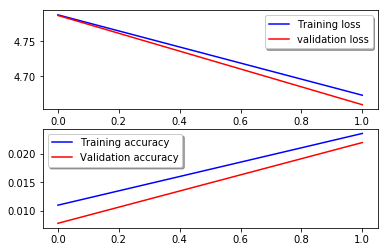

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
x_test_data = np.array(x_test_feature, np.float32) / 255. # Normalization of test data
print (x_test_data.shape)
x_test_data = np.expand_dims(x_test_data, axis = 3)
print (x_test_data.shape)


(10357, 128, 128)
(10357, 128, 128, 1)


In [22]:
#Testing our model on testing image data
results = model.predict(x_test_data)
prediction = pd.DataFrame(results)

In [39]:
# Set column names to those generated by the one-hot encoding earlier
col_names = encoded.columns.values
prediction.columns = col_names

# Insert the column id from the sample_submission at the start of the data frame
prediction.insert(0, 'id', submission['id'])


submission = prediction
submission.to_csv('dog_breed_submission.csv', index=False)